Material : <b>Natural Language Processing</b><br> Project : <b>Sentiment Analysis</b><br> Prepared by : <b> Mehdi AMOR OUAHMED</b><br> Class : <b>2 DSIA</b>  <br> Year : <b>2022-2023</b><br>
# FIFA World Cup Qatar 2022 Tweets Analysis <br>

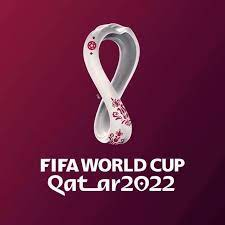

## I. Importing used librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud 

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings 
warnings.filterwarnings("ignore")
np.random.seed(4)

## II. Importing dataset

The dataset is about Qatar 2022 world cup tweets.<br>
It was collected daily from the begining of the tournament untill January 11th 2023.<br>
It contains several information about each tweet. 

In [2]:
data = pd.read_csv('tweets.csv')
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,index
0,Christian Imela,"Rwanda, Africa",Sport Journalist & Instructor|| Current news e...,2016-03-27 05:23:04+00:00,2161.0,692.0,60827.0,False,2023-01-11 18:25:01+00:00,@SMane_Officiel started to train hard for #Bun...,"['Bundesliga', 'Fitness']",Twitter for Android,NaN
1,Yvonne Ridley rat and witch validated 🐀 🧙‍♀️,Scottish Borders,"ALBA NEC & Womens convenor. Author, journalist...",2008-08-02 10:17:06+00:00,65382.0,7781.0,28625.0,True,2023-01-11 16:32:39+00:00,If you thought #QatarWorldCup2022 was an outra...,"['QatarWorldCup2022', 'Americaworldcup2026']",Twitter for iPhone,NaN
2,Derin Uver,"Ankara, Türkiye",Architect,2022-04-04 23:08:10+00:00,61.0,117.0,2463.0,False,2023-01-11 15:51:23+00:00,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,NaN,Twitter for Android,NaN
3,Ondis_Path,NaN,This is a blog created to express our faith an...,2022-01-15 10:08:11+00:00,2.0,8.0,54.0,False,2023-01-11 15:20:12+00:00,Live life in a way you will have no entitlemen...,NaN,Twitter for Android,NaN
4,yasir khan,London,| Footy | Boxing | Cricket | Gym | music | Rea...,2011-11-18 02:20:16+00:00,206.0,484.0,13503.0,False,2023-01-11 15:15:49+00:00,"Best World Cup ever, not even a debate. #Qatar...",['QatarWorldCup2022'],Twitter for iPhone,NaN


In my analysis, I am focusing on the text and some other features.<br>
In this part I devided the dataset on 2 other sets: One containing the text and another containg other information.<br>
The information I wanted to use are : `Number of followers` and `the date`.

In [3]:
tweets = pd.DataFrame(data['text'])
features = data[['text', 'user_followers', 'date']]
tweets.head()

,text
0,@SMane_Officiel started to train hard for #Bun...
1,If you thought #QatarWorldCup2022 was an outra...
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...
3,Live life in a way you will have no entitlemen...
4,"Best World Cup ever, not even a debate. #Qatar..."


## III. Data Cleaning

Data pre-processing is a crucial step in the field of natural language processing (NLP).<br> 
Cleaning data is an important part of this process, which involves organizing, formatting, removing invalid characters, and eliminating redundancies.

### 1. Dealing with missing values

In [4]:
tweets.isna().sum()

text    280171
dtype: int64

There is 280171 missing values; I deleted the rows.

In [5]:
tweets.dropna(inplace=True)
features = features.iloc[tweets.index]
tweets.isna().sum()

text    0
dtype: int64

### 2. Deleting usernames and hashtags

In [6]:
for index in tweets.index:
    tweets.loc[index, 'text_cleaned'] = ' '.join(word for word in tweets.loc[index, 'text'].split(' ') 
                                                 if not word.startswith(('@', '#')))
tweets.head()

,text,text_cleaned
0,@SMane_Officiel started to train hard for #Bun...,started to train hard for super lion trained o...
1,If you thought #QatarWorldCup2022 was an outra...,If you thought was an outrageous show of sport...
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,😭😭😭😭😭😭😭This beautiful soul is looking for a ho...
3,Live life in a way you will have no entitlemen...,Live life in a way you will have no entitlemen...
4,"Best World Cup ever, not even a debate. #Qatar...","Best World Cup ever, not even a debate."


### 3. Deleting emojis

In [7]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
for index in tweets.index:
    tweets.loc[index, 'text_cleaned'] = emoji_pattern.sub(r'', tweets.loc[index, 'text_cleaned'])
tweets.head()

,text,text_cleaned
0,@SMane_Officiel started to train hard for #Bun...,started to train hard for super lion trained o...
1,If you thought #QatarWorldCup2022 was an outra...,If you thought was an outrageous show of sport...
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,This beautiful soul is looking for a home. Wou...
3,Live life in a way you will have no entitlemen...,Live life in a way you will have no entitlemen...
4,"Best World Cup ever, not even a debate. #Qatar...","Best World Cup ever, not even a debate."


### 4. Deleting Punctuations, Numbers, and Special Characters

In [8]:
tweets['text_cleaned'] = tweets['text_cleaned'].str.replace("[^a-zA-Z#]", " ")
tweets.head()

,text,text_cleaned
0,@SMane_Officiel started to train hard for #Bun...,started to train hard for super lion trained o...
1,If you thought #QatarWorldCup2022 was an outra...,If you thought was an outrageous show of sport...
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,This beautiful soul is looking for a home Wou...
3,Live life in a way you will have no entitlemen...,Live life in a way you will have no entitlemen...
4,"Best World Cup ever, not even a debate. #Qatar...",Best World Cup ever not even a debate


### 5. Filtering Stop Words
Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it.<br>
Very common words like 'in','is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text.

In [9]:
stop_words = set(stopwords.words('english'))
for index in tweets.index:
    word_tokens = word_tokenize(tweets.loc[index, 'text_cleaned'])
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    tweets.loc[index, 'text_cleaned'] = ' '.join(word for word in filtered_sentence)
tweets.head()

,text,text_cleaned
0,@SMane_Officiel started to train hard for #Bun...,started train hard super lion trained Bayern M...
1,If you thought #QatarWorldCup2022 was an outra...,If thought outrageous show sportswashing https...
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,This beautiful soul looking home Would like op...
3,Live life in a way you will have no entitlemen...,Live life way entitlements mentality anything ...
4,"Best World Cup ever, not even a debate. #Qatar...",Best World Cup ever even debate


### 6. Stemming
Stemming is a text processing task in which we reduce words to their root, which
is the core part of a word. For example, the words “helping” and “helper” share
the root “help”.<br>
Stemming allows you to zero in on the basic meaning of a word
rather than all the details of how it’s being used.

In [10]:
stemmer = PorterStemmer()
for index in tweets.index:
    word_tokens = word_tokenize(tweets.loc[index, 'text_cleaned'])
    i=0
    for w in word_tokens:
        word_tokens[i] = stemmer.stem(w)
        i+=1
    tweets.loc[index, 'text_cleaned'] = ' '.join(word for word in word_tokens)
tweets.head()

,text,text_cleaned
0,@SMane_Officiel started to train hard for #Bun...,start train hard super lion train bayern munic...
1,If you thought #QatarWorldCup2022 was an outra...,if thought outrag show sportswash http co hhpz...
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,thi beauti soul look home would like open home
3,Live life in a way you will have no entitlemen...,live life way entitl mental anyth rather heart...
4,"Best World Cup ever, not even a debate. #Qatar...",best world cup ever even debat


### 7. Visualisation of most used words in all tweets

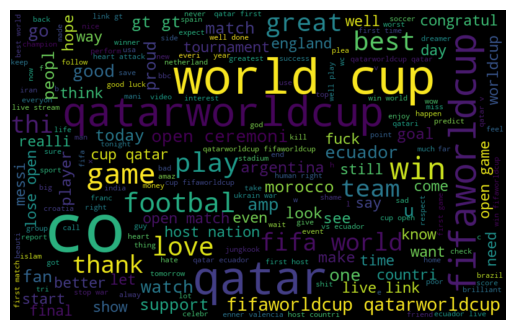

In [11]:
words = ' '.join([text for text in tweets['text_cleaned']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## IV. Sentiment Analysis
This is the most important part; I will do these tasks:
- Calculation of polarity and subjectivity.
- Calculation of sentiment intensity (positive, negative, neutral).
- Analysing the results.

### 1. Calculation of polarity and subjectivity
<b>Polarity :</b> is a float that lies between [-1,1]:
- -1 indicates <b>negative</b> sentiment 
- +1 indicates <b>positive</b> sentiments

<b>Subjectivity :</b> is also a float which lies in the range of [0,1].<br> 
Subjective sentences generally refer to personal opinion, emotion, or judgment. 

In [12]:
for index in tweets.index:
    sentiment = TextBlob(tweets.loc[index, 'text_cleaned']).sentiment
    tweets.loc[index, 'ploarty'] = sentiment[0]
    tweets.loc[index, 'subjectivity'] = sentiment[1]
tweets.head()

,text,text_cleaned,ploarty,subjectivity
0,@SMane_Officiel started to train hard for #Bun...,start train hard super lion train bayern munic...,0.020833,0.604167
1,If you thought #QatarWorldCup2022 was an outra...,if thought outrag show sportswash http co hhpz...,0.000000,0.000000
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,thi beauti soul look home would like open home,0.000000,0.500000
3,Live life in a way you will have no entitlemen...,live life way entitl mental anyth rather heart...,0.152841,0.418750
4,"Best World Cup ever, not even a debate. #Qatar...",best world cup ever even debat,1.000000,0.300000


### 2. Calculation of sentiment intensity (positive, negative, neutral)
I used vaderSentiment package that gives us a score for each of the intensities we have: `positive`, `negative`, and `neutral`

In [13]:
MyAnalyzer = SentimentIntensityAnalyzer()
for index in tweets.index:
    intensity = MyAnalyzer.polarity_scores(tweets.loc[index, 'text_cleaned'])
    tweets.loc[index, 'neg'] = intensity['neg']
    tweets.loc[index, 'neu'] = intensity['neu']
    tweets.loc[index, 'pos'] = intensity['pos']
    tweets.loc[index, 'compound'] = intensity['compound']
tweets.head()

,text,text_cleaned,ploarty,subjectivity,neg,neu,pos,compound
0,@SMane_Officiel started to train hard for #Bun...,start train hard super lion train bayern munic...,0.020833,0.604167,0.06,0.773,0.167,0.5423
1,If you thought #QatarWorldCup2022 was an outra...,if thought outrag show sportswash http co hhpz...,0.000000,0.000000,0.00,1.000,0.000,0.0000
2,@ozgeemeert 😭😭😭😭😭😭😭This beautiful soul is look...,thi beauti soul look home would like open home,0.000000,0.500000,0.00,0.762,0.238,0.3612
3,Live life in a way you will have no entitlemen...,live life way entitl mental anyth rather heart...,0.152841,0.418750,0.00,0.747,0.253,0.7964
4,"Best World Cup ever, not even a debate. #Qatar...",best world cup ever even debat,1.000000,0.300000,0.00,0.543,0.457,0.6369


### 3. Conclusion about the sentiment of each tweet

In [14]:
for index in tweets.index:
    negative = tweets.loc[index, 'neg']
    positive = tweets.loc[index, 'pos']
    neutral = tweets.loc[index, 'neu']
    if (negative >= positive) & (negative >= neutral) :
        tweets.loc[index, 'sentiment'] = 'Negative'
    elif positive >= neutral :
        tweets.loc[index, 'sentiment'] = 'Positive'
    else :
        tweets.loc[index, 'sentiment'] = 'Neutral'
tweets.sample(5)

,text,text_cleaned,ploarty,subjectivity,neg,neu,pos,compound,sentiment
500,WORLD CHAMPIONS 🇦🇷🏆💙 \n\n#Argentina #FIFAWorld...,world champion # argentina http co gaklrop xp,0.000,0.000,0.000,0.480,0.520,0.7579,Positive
291688,No but it's so embarrassing for Qatar they pla...,no embarrass qatar play countri win # qatarwor...,0.800,0.400,0.000,0.527,0.473,0.7957,Neutral
288400,🎉 Let's play and win mga ka-lodi!\n👍 REGISTER ...,let play win mga ka lodi regist here http co o...,0.800,0.400,0.000,0.763,0.237,0.7351,Neutral
3540,"Aruna Sibal, 36, India. Dumper roller. Cause o...",aruna sibal india dumper roller caus death nat...,-0.125,0.375,0.432,0.429,0.139,-0.8360,Negative
290064,• Game: OVER 👌\n\n@FEFecuador take all 3 point...,game over fefecuador take point memor game beh...,-0.400,0.400,0.200,0.800,0.000,-0.5423,Neutral


### 3. Visualization of the results

#### Sentiment Distribution across all data

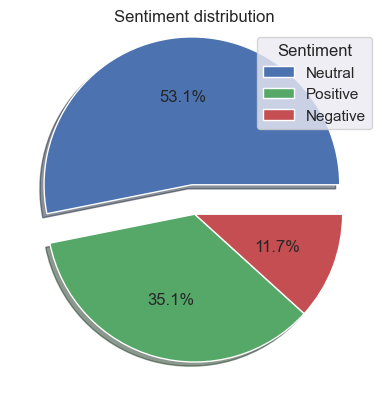

In [15]:
plt.pie(tweets['sentiment'].value_counts(), 
        explode = [0.2, 0, 0], 
        shadow = True,
        colors = ['b', 'g', 'r'],
        autopct='%1.1f%%')
plt.legend(title="Sentiment", labels = tweets['sentiment'].value_counts().index)
plt.title('Sentiment distribution')
plt.show()

#### Most used words in positive tweets

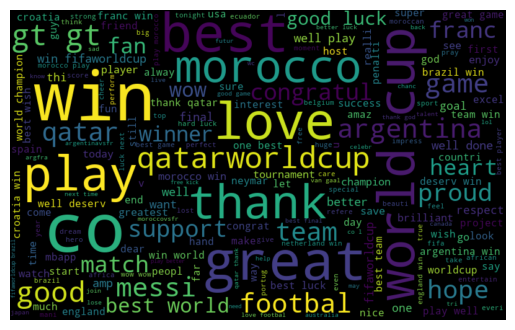

In [16]:
words = ' '.join([text for text in tweets[tweets['sentiment']=='Positive']['text_cleaned']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 
# plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

#### Most used words in negative tweets

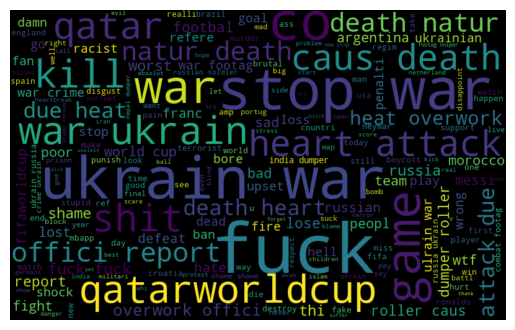

In [17]:
words = ' '.join([text for text in tweets[tweets['sentiment']=='Negative']['text_cleaned']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 
# plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### 4. Analysing results

I joined the dataframes `features` and `tweets` to have the features next to the sentiment column to study the impact of some of them.

In [18]:
df = tweets.join(features.set_index('text'), on='text')
df.reset_index(inplace=True)

#### The impact of date
In this section, I wanted to research the effects of the tweet's creation date.<br>
So, I devided the dates into periods (`During World Cup` , `After World Cup`) to study the differnce of the sentiment through these periods.

In [19]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [20]:
for index in df.index:
    if df.loc[index, 'date'] < pd.to_datetime('2022-12-18').tz_localize(tz='+00:00'):
        df.loc[index, 'period'] = 'During World Cup'
    else:
        df.loc[index, 'period'] = 'After World Cup'

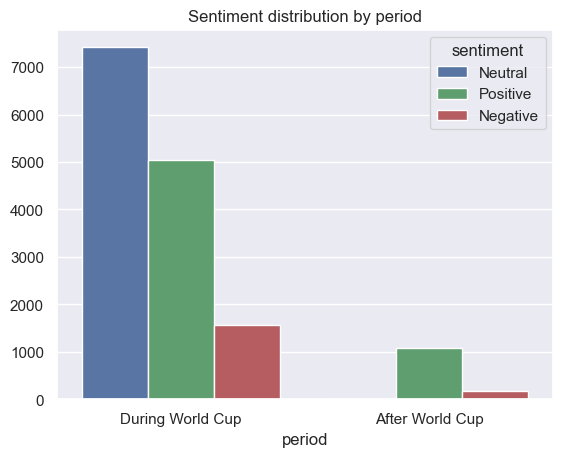

In [21]:
my_plot=sns.countplot(x='period', hue='sentiment', data=df, 
                      order=['During World Cup', 'After World Cup'], 
                      hue_order=['Neutral', 'Positive', 'Negative'], palette=['b', 'g', 'r'])
my_plot.set_xticklabels(my_plot.get_xticklabels())
plt.ylabel('')
plt.title('Sentiment distribution by period')
plt.show()

We can state that after the end of the tournament, the number of neutral tweets <b>vanished</b> and the number of negative tweets <b>significantly reduced</b>.

#### The impact of number of followers
In this section, I intended to investigate how a user's followers number affected his tweets.<br>
So, I devided the tweets into groups based on the number of followers:
- Less than 20 followers
- Between 20-100 followers
- Between 100-1000 followers
- More than 1000  followers

In [22]:
def column_group(column):
    interval=''
    if (column<=20):
        interval="0-20"
    elif(column<100):
        interval='20-100'
    elif(column<1000):
        interval='100-1000'
    else:
        interval='>1000'
        
    return interval

In [23]:
df['user_followers'] = df['user_followers'].apply(column_group)

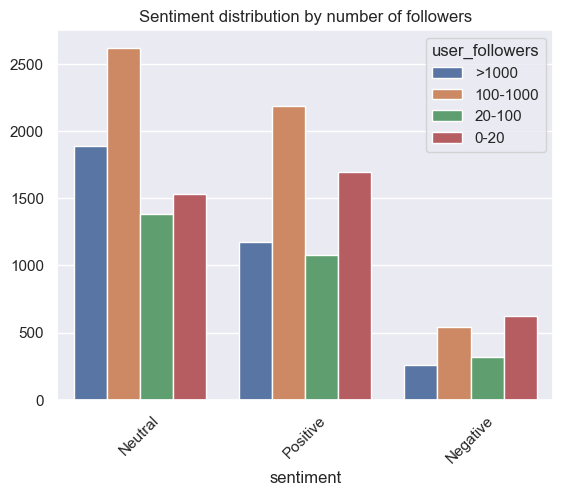

In [24]:
my_plot=sns.countplot(x='sentiment', hue='user_followers', 
                      hue_order=['>1000', '100-1000', '20-100', '0-20'], 
                      order=['Neutral', 'Positive', 'Negative'], data=df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.ylabel('')
plt.title('Sentiment distribution by number of followers')
plt.show()

We can plainly observe that your willingness to tweet negative comments <b>increases</b> as your number of followers <b>decreases</b>.